# Chap01 - Introduction

## 1.2 베이지안 프레임워크

$$
P\left( { A }|{ X } \right) =\frac { P\left( { X }|{ A } \right) P\left( A \right)  }{ P\left( X \right)  } \propto P\left( { X }|{ A } \right) P\left( A \right) 
$$

### 1.2.1 예제: 피해갈 수 없는 동전 던지기

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html 참고

%matplotlib inline
import matplotlib
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt


# matplotlib.rc('font', family='Malgun Gothic')  # Windows
matplotlib.rc('font', family='AppleGothic')  # Mac
figsize(11, 9)

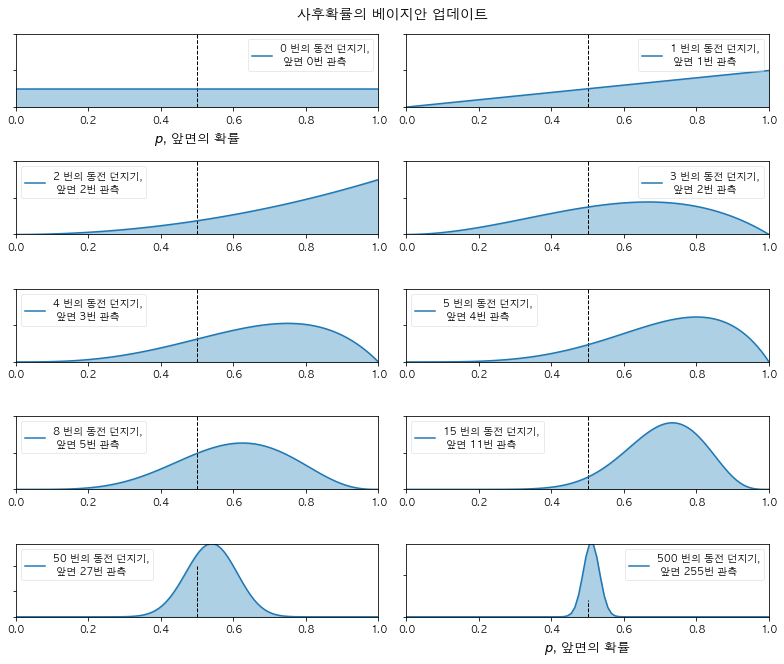

In [3]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    if k in [0, len(n_trials) - 1]:
        plt.xlabel('$p$, 앞면의 확률', fontsize = 13)
    else:
        None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label='{} 번의 동전 던지기,\n 앞면 {}번 관측'.format(N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)

plt.tight_layout()

### 1.2.2 예제: 사서일까, 농부일까?

In [8]:
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

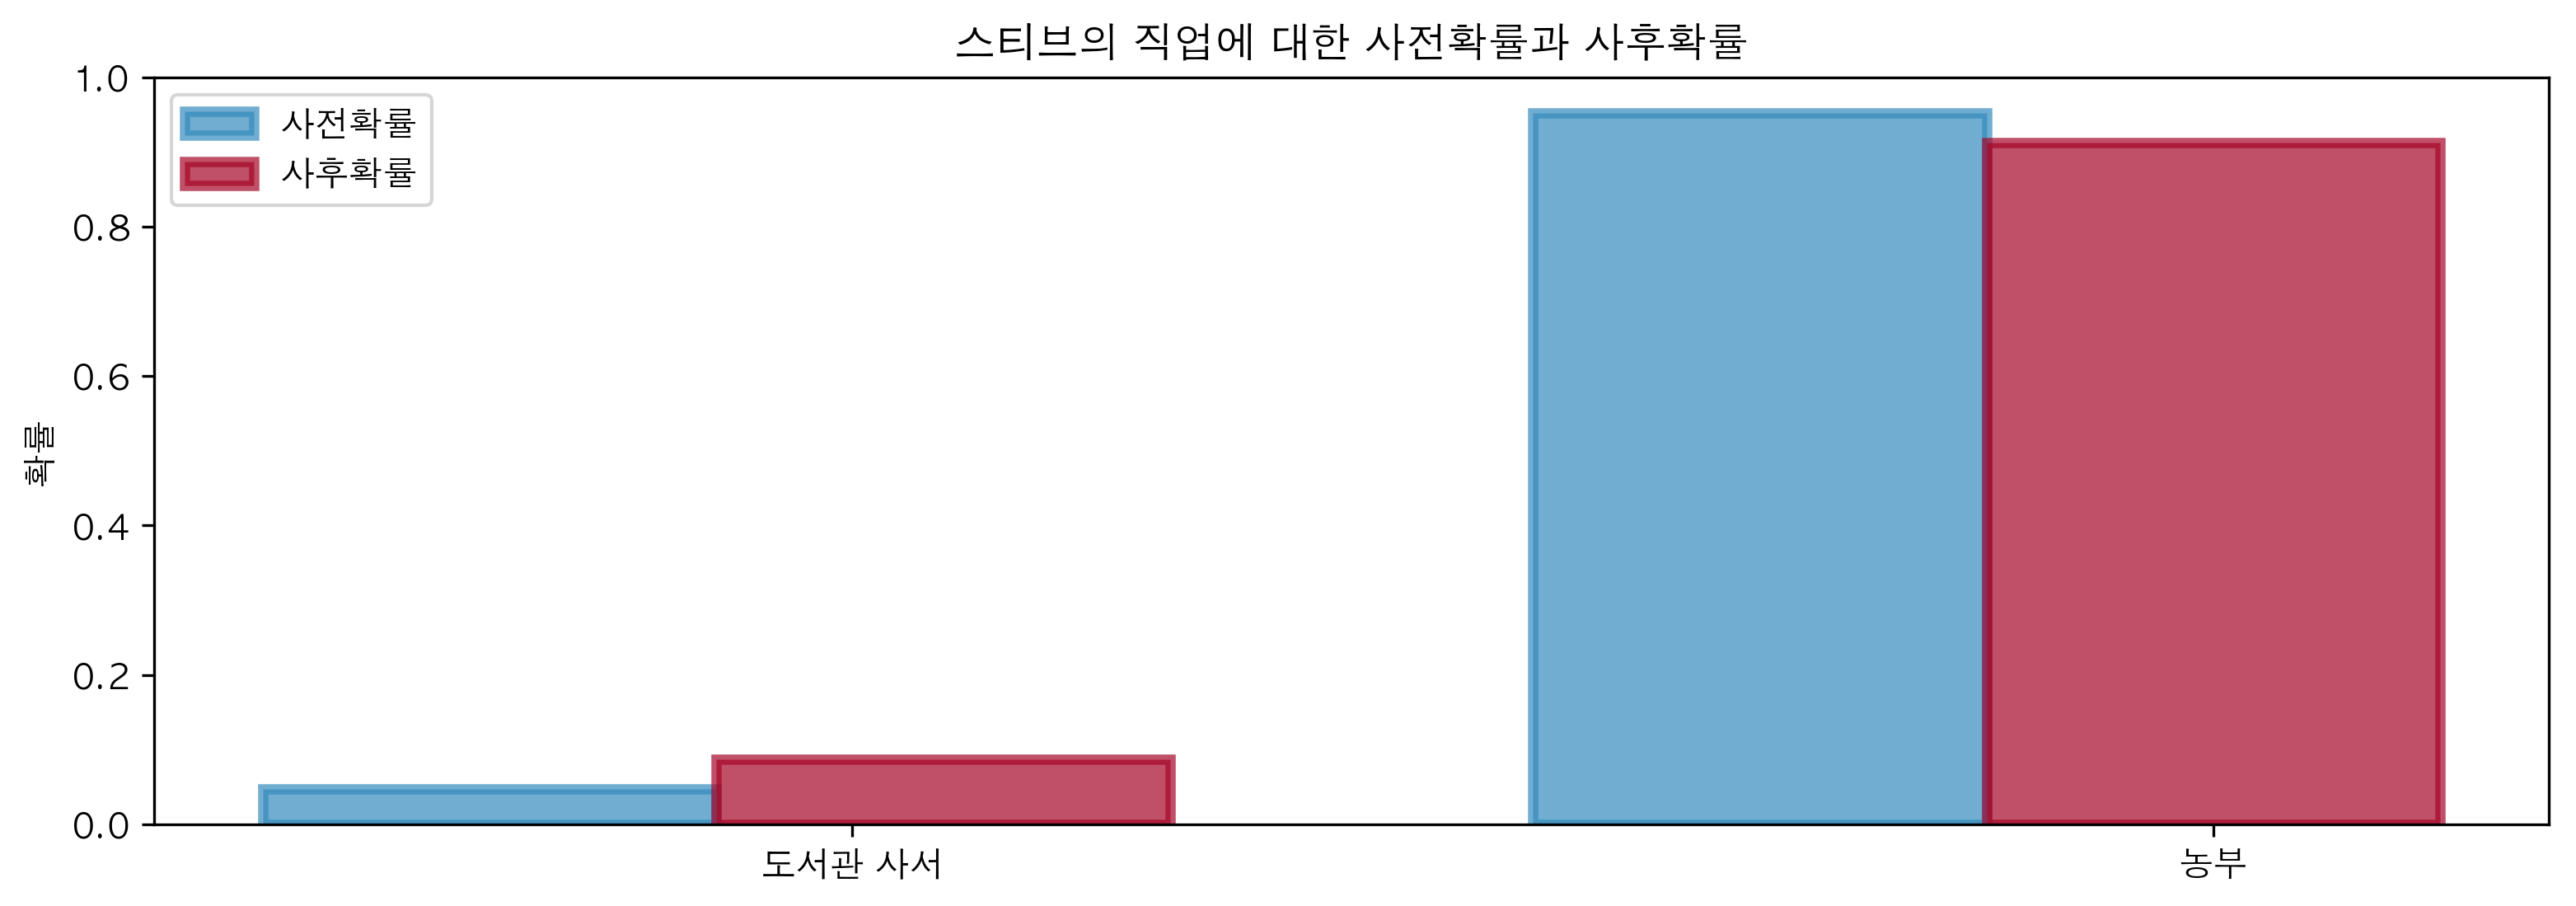

In [9]:
colors = ['#348ABD', "#A60628"]
prior = [1/21., 20/21.]  # 사전확률 : [P(A), P(~A)] 
posterior = [0.087, 1-0.087]  # 사후확률 : [P(A|X), P(~A|X)]
plt.bar([0, .7], prior, alpha=0.7, width=0.25,
        color=colors[0], label="사전확률", 
        lw="3", edgecolor='#348ABD')

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7, 
        width=0.25, color=colors[1], label='사후확률', 
        lw="3", edgecolor='#A60628')

plt.xticks([0.20, 0.95], ['도서관 사서', '농부'])
plt.title('스티브의 직업에 대한 사전확률과 사후확률')
plt.ylabel('확률')
plt.legend(loc='upper left')

## 1.3 확률분포

### 1.3.1 이산적인 경우

$Z$를 화률변수(random variable)라고 하고, 이산적이라면 그 분포를 ***확률질량함수 (probability mass function)*** 라고 한다.

확률질량함수는 $Z$가 특정값 $k$를 가질 때의 확률, $P(Z=k)$ 를 나타낸다.

#### 푸아송분포 Poisson-ditribution

$$
P(Z=k) = \frac{\lambda^k e^{- \lambda}}{k!}, \quad k=0,1,2,...
$$

- $\lambda$는 분포의 모수이며 분포 모양을 결정한다. 푸아송분포에서 $\lambda$는 양수다. 
- $\lambda$를 늘리면 큰 값에 더 많은 확률을 부여하고, 줄이면 작은 값에 더 많은 확률을 부여한다. 
    - $\lambda$는 푸아송 분포의 ***밀도(intensity)*** 를 나타낸다.

- $k$ 는 음수가 아닌 정수($0, 1, 2, \cdots$)여야 한다. $\rightarrow$ *인구 모델일 경우 4.25명인 경우는 없다!*

확률변수 $Z$가 푸아송분포를 따른다면 다음과 같이 나타낼 수 있다.

$$
Z \sim Poi (\lambda)
$$

푸아송분포의 유용한 속성 한 가지는 그 기대값이 모수와 같다는 것이다.

$$
E[Z|\lambda] = \lambda
$$

아래의 예제는 [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy-stats-poisson) 을 이용해 푸아송분포를 구현한 코드이다.

Text(0.5,1,'$\\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수($pmf$)')

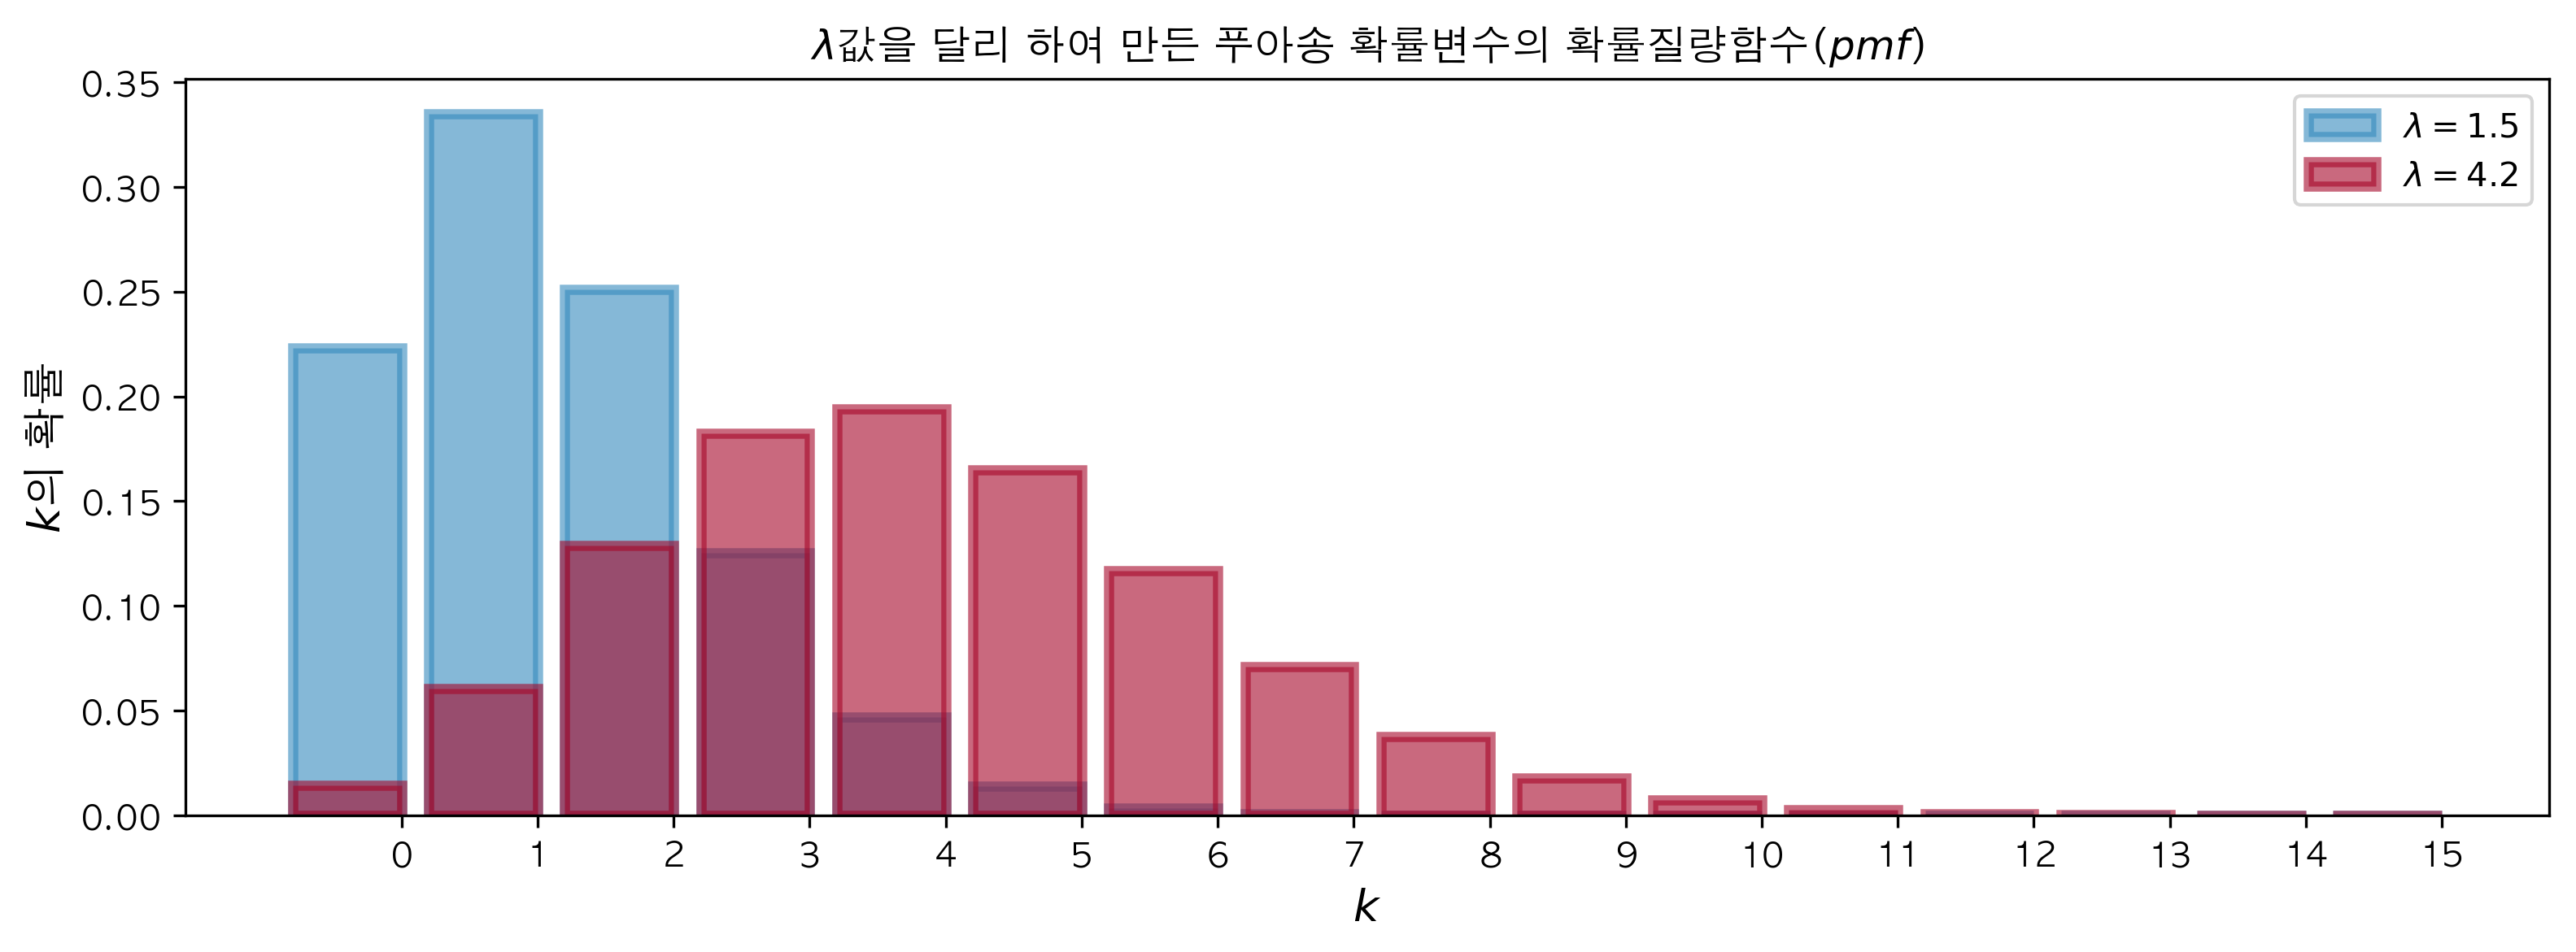

In [15]:
figsize(12.5, 4)

a = np.arange(16)  # array([ 0, ..., 15])
poi = stats.poisson
lambdas = [1.5, 4.25]  # 푸아송분포의 lambda
colors = ['#348ABD', '#A60628']

for lambda_, color in zip(lambdas, colors):
    plt.bar(a, poi.pmf(a, lambda_), color=color, 
        label='$\lambda={:.1f}$'.format(lambda_), 
        alpha=0.60, edgecolor=color, lw='3')
    
plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel('$k$의 확률', fontsize=13)
plt.xlabel('$k$', fontsize=13)
plt.title('$\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수($pmf$)')